We have a $N$ number of data points $x_{1}, x_{2}, ...x_{N}$ and their corresponding values
$t_{1}, t_{2}, ...t_{N}$.

our task is to find out a  function $y$ (called model in context of machine learning) that verify:

$~~~$ $y(x_{i})\thickapprox t_{i}$ for all $i$ in {1, 2, ..., N}.

in this notebook the model $y$ is polynom of the form:

$~~~~~~~~~~~$ $y(W, x)=\sum_{i=1}^{M}w_{i}x^i$

 $y$ is called a polynomial regression.
 
 $M$ is the degree of the $y$, M is A unknown parameter that estimated from the data.

$W$ is the vector of weights.

in mathematic view, the problem that we try to solve is the following:

$~~~~~~~$ $\operatorname*{argmin}_w error(w)$

in other word, we attempt to find out the best weights that minimize the error functions that mesures the distances between reals values $t$ and the predictions $y$.

there is a lot of techniques to handle this problem, the most famous ones $Gradient$ $~~$
$desent$, we will come back this later, now we consider the following solution avaible in numpy by taking advantages of functions $numpy.polyfit$ with $numpy.poly1d$ or directly $numpy.linalg.solve$:

\begin{bmatrix}
1 & x_{1} & x_{1}^{2} & \dots & x_{1}^{M} \\ 
1 & x_{2} & x_{2}^{2} & \dots & x_{2}^{M} \\
 \\
1 & x_{M} & x_{n}^{2} & \dots & x_{N}^{M}
\end{bmatrix}
firstly we replace the $vandemonde$$~$$matrix$(the above matrix) by the symbole $X$, we obtain :

$~~~~~~~$ $y(W, x)=\sum_{i=1}^{M}w_{i}x^i \Longleftrightarrow W^{T}X=y (*)$ 

$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$ $\Longleftrightarrow W^{T}XX^{T}=yX^{T} $ 

$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$ $\Longleftrightarrow W^{T}(X^{T}X)^{T}=(Xy^{T})^{T}$  

$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$ $\Longleftrightarrow W^{T}XX^{T}=yX^{T} $ 

$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$ $\Longleftrightarrow XX^{T}W=Xy^{T} $ 

if we pose :
$A=XX^{T}$ and $b=yX^{T}$ , we obatain the follwin linear equation with respect to the weight $w$, 
$Aw=b (\star)$ , that camn easily slove it computationaly by the follwing command:
w=numpy.linalg.solve(A, b).(this core idea in the our training method(fit)).

by manipulating a simple calcul in linear algebra (take advantage of the formula $(AB)^{T}=B^{T}A^{T}$



$\mathbb{attention}$!!!!

$(W^{T}=yX^{-1}$ is invalid,  $X$ is not a squared matrix so X^{-1} doesn't exist.
X is not invertible)

by manipulating a simple calcul in linear algebra (take advantage of the formula $(AB)^{T}=B^{T}A^{T}$

$~~~~~~~$ $y(W, x)=\sum_{i=1}^{M}w_{i}x^i \Longleftrightarrow w=(X^{T}X)^{-1}X^{T}y (\star \star)$ 

you can choose also choose the $(\star \star)$ to create your own training method and take advantage of the function

$numpy.linalg.inv$ and $numpy.dot$, the following code based on the formula $(\star)$ for $fit$ method and (*) for predict method:

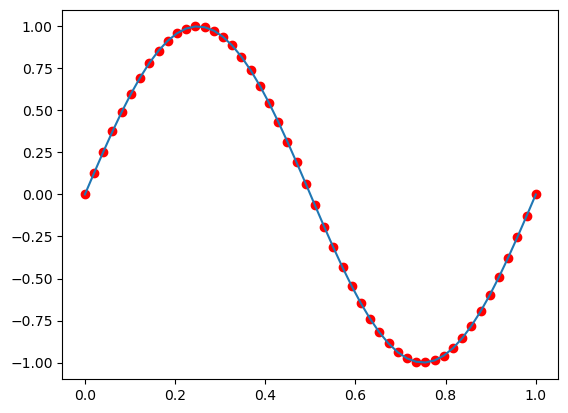

/tmp/ipykernel_32/2274291850.py:67: RankWarning: Polyfit may be poorly conditioned
  model.fit(X, t)


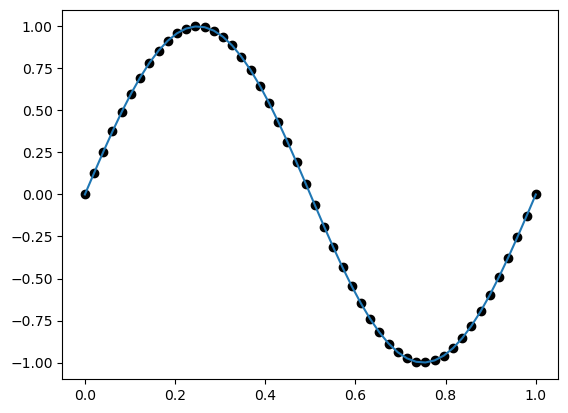

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class PolynomialRegression1:
    def __init__(self, M=3):
        self.M = M

    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)
        assert X.ndim==t.ndim
        # degree M must be less than N number of data ponits(M<N)
        assert self.M<X.shape[0]
        X = np.vander(X, self.M + 1, increasing=True)
        self.w = np.linalg.solve(np.dot(X.T, X), np.dot(X.T, y))

    def predict(self, X):
        X = np.array(X)
        X = np.vander(X, self.M + 1, increasing=True)
        return np.dot(X, self.w)

# Example usage
X = np.linspace(0,1,50)
t=np.sin(2*np.pi*X)

model = PolynomialRegression1(M=20)
model.fit(X, t)

y_pred = model.predict(X)

plt.scatter(X, y_pred,c='red' )
plt.plot(X, t)
plt.show()



import numpy as np
import matplotlib.pyplot as plt

class PolynomialRegression2:
    
    def __init__(self, M:int=3):
        'M is really depend to your task'
        self.M=M
        # intializationthe weight with M random vaues between -1 and 1
        self.w=np.random.rand(M)

    def fit(self, X, t):
        # convert X, y to numpy array
        X, t=np.array(X), np.array(t)
        assert X.ndim==t.ndim
        # degree M must be less than N number of data ponits(M<N)
        assert self.M<X.shape[0] 
        # w is weights (coefficients)that matching(fitting) to the polynomial regession
        self.w=np.polyfit(X, t, deg=self.M) # deg is the degree of the polynom set it a M
        return self.w

    def predict(self, x):
        y=np.poly1d(self.w)(x)
        return y
    
# Example usage
X = np.linspace(0,1,50)
t=np.sin(2*np.pi*X)

model = PolynomialRegression2(M=20)
model.fit(X, t)

y_pred = model.predict(X)

plt.scatter(X, y_pred,c='black' )
plt.plot(X, t)
plt.show()




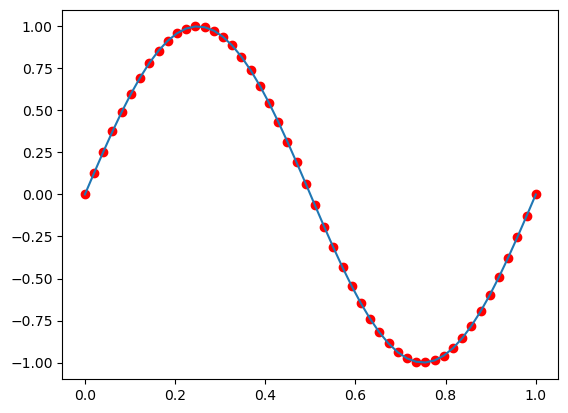

In [2]:
import numpy as np
import matplotlib.pyplot as plt

class PolynomialRegression3:
    def __init__(self, M=3):
        self.M = M

    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)
        assert X.ndim==t.ndim
        # degree M must be less than N number of data ponits(M<N)
        assert self.M<X.shape[0]
        X = np.vander(X, self.M + 1, increasing=True)
        self.w = np.linalg.solve(np.dot(X.T, X), np.dot(X.T, y))

    def predict(self, X):
        X = np.array(X)
        X = np.vander(X, self.M + 1, increasing=True)
        return np.dot(X, self.w)

# Example usage
X = np.linspace(0,1,50)
t=np.sin(2*np.pi*X)

model = PolynomialRegression3(M=20)
model.fit(X, t)

y_pred = model.predict(X)

plt.scatter(X, y_pred,c='red' )
plt.plot(X, t)
plt.show()


## PolynomialRegression with gradien descent:

in some cases, in mchine learning, you cannot getting the weights directly from the equation or mathematic formula, a lot of problem of optimization are intractable, or even it is attractable in the context of the mathematic it can be intractable in term of source of computationality, capacity of memories, etc... that in the end are limited.
that enforce the scientist to look to another realistic options like approximations.
in this paragraph one of the robust technique optimization, it is $gradient$$~$$descent$.
there is out there a lot of versions of $gradient$$~$$descent$ technique, we will look each of them later.
we can define define $gradient$ $~$ $descent$ as iterative model (due the weights updated in each iteration).
to make things simple , we take $sthocastic$ $~$ $gradient$ $~$ $descent$, $SGD$ for short, as an introduction:
as we said earlier, we will tackle the problem:

$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$ $\operatorname*{argmin}_w error(w)$

we define the $gradient$ of the error-function $error$ (depend on the usable context, it may called $cost$ $~$function or $loss$ $~$function) are given by derivative of $error$ with respect to the wights $w$ that lead us to:

$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$ $gradient$ $~$ =$\dfrac{\partial{error(w)}}{\partial{w}}$

we performing the $SGD$ algorithm  through following updated formula:

$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$ $~$ $w^{new}=w^{old}-\eta\dfrac{\partial{error(w)}}{\partial{w}}$

$\eta$ is called the $learning$ $~$ $rate$ , usually is taken between 0 and 1 exclusively.
in each iteration we reduce the $error$ function.

the question here is what explicit expression that apporoprite $Polynomial$$~$$Regression$?

in this notebook, we take as guide the book of $pattern$$~$$recognition$$~$$and$$~$$machine$$~$$
learning$ that define the $error$ function as the follwing:

 $~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$$error(w)=1/2 \sum_{n=1}^{N}({y(x_{n}, w)-t_{n}})^2$

we derivative with respect to $w$ and take advantaage of cahin formula, we obtain the following result:

$~~~~~~~~~~~~~~~$ $\dfrac{\partial{error(w)}}{\partial{w}}=1/2 \sum_{i=1}^{M}\dfrac{\partial{error(w)}}{\partial{w_{i}}}\partial{w_{i}}/\partial{w}$ 

 $~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$ $=1/2 \sum_{i=1}^{M}\dfrac{\partial{\sum_{n=1}^{N}({y(x_{n}, w)-t_{n}})^2}}{\partial{w_{i}}}\partial{w_{i}}/\partial{w}$ 

 $~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$ =$\sum_{i=1}^{M}\sum_{n=1}^{M}x^{i}_{n}(y(xn,w)-tn)$

 $~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$$=X^{T}(Y-T)$
 
 the update iteration become:
  $~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$ $w^{new}=w^{old}-\eta(X^{T}(Y-T))$
  
 now we put all together, and jumping to code



            







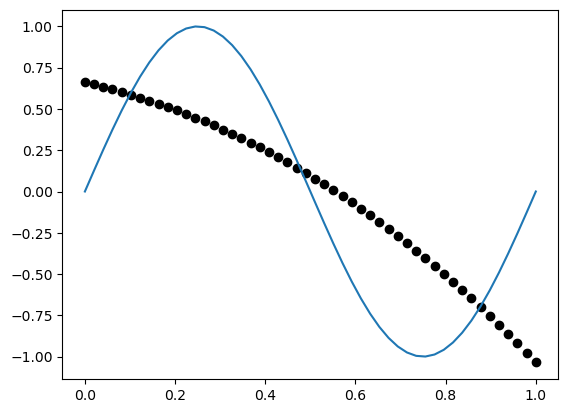

In [68]:
import numpy as np
import matplotlib.pyplot as plt

class PolynomialRegression4:
    ''' M the degree of polynome, learning_rate, num_iterations are the parameters that can make
    our model perform better or worse sa depends to their values, this latest does not changes during the training, unlike of
    the hyparameters weights that changes in eatch iterations '''
    
    def __init__(self, M:int=3, learning_rate:float=0.001,num_iterations=1000):
        self.M=M
        self.learning_rate=learning_rate 
        self.num_iterations=num_iterations
        self.w=np.random.rand(M+1)
        
        
        
    def fit(self, X, t):
        X,t=np.array(X), np.array(t)
        assert X.ndim==t.ndim
        assert self.M<X.shape[0]
        X=np.vander(X, self.M+1, increasing=True)
        for i in range(self.num_iterations):
            # update the predictions
            y=np.dot(X, self.w.T)
            # update the weights
            self.w=self.w-self.learning_rate*np.dot(X.T, y-t)
        return self.w
            
    def predict(self, X):
        X=np.array(X)
        X=np.vander(X, self.M+1, increasing=True)
        y=np.dot(X, self.w.T)
        return y
# Example usage
X = np.linspace(0,1,50)
t=np.sin(2*np.pi*X)

model = PolynomialRegression4() 
model.fit(X, t)

y_pred= model.predict(X)

plt.scatter(X, y_pred,c='black' )
plt.plot(X, t)
plt.show()

        
            
        
        

as we we expected, unlike the previous models that perform perfectly in the toy data that depend only on the one parameter $M$, this latest model depend the three parameters $\eta=learning$$~$$rate$ and $n=num$_$iterations$.
in the view mathematic the problem is:

$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$$\operatorname*{argmin}_{M,n,\eta }\operatorname*{argmin}_w error(w)$

so let's try to programme a $class$ that search for best parameters.






In [57]:
class GridSearch:
    
    def __init__(self, model):
        self.model=model
        self.dic={}
        self.errors=100
    def error(self, X, t, y):
        error=(y-t).T@(y-t)
        return error
        
    def best_params(self, X, t):
         for num_iterations in  range(100, 1000000, 1000):
            for M in range(3, 15):
                for learning_rate in np.arange(0.0001, 0.01, 0.0001):
                    y=PolynomialRegression4(M=M, learning_rate=learning_rate, num_iterations=num_iterations).predict(X)
                    self.dic[(num_iterations, M, learning_rate)]=self.error(X,t,y)
        
         num_iterations, M, learning_rate=max(self.dic, key=self.dic.get)
         return 'M='+str(M), 'learning_rate='+str(learning_rate), 'num_iterations='+str(num_iterations)
model=PolynomialRegression4(M=3, learning_rate=0.001, num_iterations=1000).predict(X)
best_params=GridSearch(model).best_params(X, t)
best_params # ('M=14', 'learning_rate=0.0085', 'num_iterations=242100')



('M=14', 'learning_rate=0.009', 'num_iterations=502100')

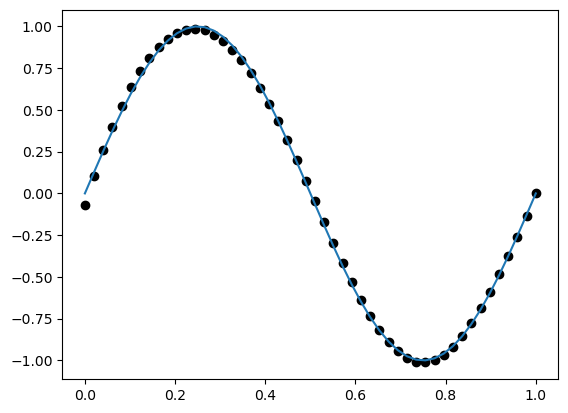

In [61]:
import numpy as np
import matplotlib.pyplot as plt
# the follwwing is the same as four model with good parameters
class PolynomialRegression5:
    
    def __init__(self, M=14, learning_rate=0.009, num_iterations=502100):
        self.M=M
        self.learning_rate=learning_rate 
        self.num_iterations=num_iterations
        self.w=np.random.rand(M+1)
        
        
        
    def fit(self, X, t):
        X,t=np.array(X), np.array(t)
        assert X.ndim==t.ndim
        assert self.M<X.shape[0]
        X=np.vander(X, self.M+1, increasing=True)
        for i in range(self.num_iterations):
            # update the predictions
            y=np.dot(X, self.w.T)
            # update the weights
            self.w=self.w-self.learning_rate*np.dot(X.T, y-t)
        return self.w
            
    def predict(self, X):
        X=np.array(X)
        X=np.vander(X, self.M+1, increasing=True)
        y=np.dot(X, self.w.T)
        return y
# Example usage
X = np.linspace(0,1,50)
t=np.sin(2*np.pi*X)

model = PolynomialRegression5() 
model.fit(X, t)

y_pred= model.predict(X)

plt.scatter(X, y_pred,c='black' )
plt.plot(X, t)
plt.show()



well, we can also search for good parameters randomly in more ranges by taking advantages of the $numpy.random$ functions $randint$ and $choice$
or you can initialize your search in best_params that you get and research again(indeed you can also perform Bayesian search), anyway 
there a lot of techniques for parameters optimizations as $cross$$~$$validation$,( we will look at this later), $regularizations$.

## Regularization:

Before introducing the concept of $regularization$, we need to summarize a pipline of machine learning model from end-to-end in the real-world:

1==> framing and indentifying the problem(asking the right questions, tools, constraints,...)

2==>gathering $data$ through scraping, getting it from databases, manually...

3==>data preparation (cleaning data, exploration data analysis EDA, feature engineering...etc, splitting data into $training$$~$$data$ (to build a model ) and $test$$~$ $data$, this latest never seen by the model, as rules othumb $training$$~$$data$=75%$data$ and the rest is reserve for $test$$~$ $data$.

4==>choice and build the model.

5==>model's evaluation: after training the model using $training$$~$$data$, firstly we test the model in the model $training$$~$$data$, if the model desn't perform well even in  the $training$$~$$data$, we say that the model suffer from $underfitting$(when we set M=1,our models underfit 
the $training$$~$$data$ due  simplicity of the model(linear model)), if the model perform well in the $training$$~$$data$ and their performance deteriorating in the $test$$~$ $data$, we say that the model suffer from $overfitting$ (if set the parameter M a high value due complixity of the model) or it doesn't make good generalization in the new data.

6==>model's optimization.

7==> production.

the $regurilization$ is one of the crucial  and useful technique  to overcome $overfitting$ issue, we can also use it to tackle issues of $underfitting$ ,$CurseOfDimensionality$(for example $w_{i}=0$ forall $i$>M_{0}) , getting best parameters...etc

$\mathbb{TIP}$:
in the statistical literature tackling of $underfitting$(high $bias$) and $overfitting$ (high $variance$) is equivalent to
$variance-bias-trade-off$.

there out there a lot $regulirization$ techniques, but here we briefly introduce two common ones:

1==>Early Stopping:there is lot methods  to perform this techniques for examples:

$a$- if we use $gradient$ $~$ $descent$ as $optimizer$ (usuallay the $error$ reduce in each updated step), we st a threshold $epsilon$
when the $erro<threshold)$ we breaking the infinite loop we can summrize that by the follwing pseucode:

     def
     
     def fit(self, X,t, threshold):
         ...
         
         while threshold<error: 
             updated_step
             
             
     def predict(self, X):
          ....
             
     

b==>by setting $patience$ parameter, we breaking the iterative algorirthm when there is no improvement after $ptience $step, or mesuring the $rate$ between $error$ of $training$ $~$ $data$ and $error$ of $test$ $~$ $data$, when we see that the $rate$ starts to increase(the model is start to overfit data) we stop the traing after $patience$ step

2==> adding a l1-$penalty$ $~$$(|w|_{1})$ term or l2-$penalty$ $~$ $(|w|_{2})$ term to the $error$ function, so the $error$ might take two new forms:

$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$ $l1error(w)=error(w)+\lambda|w|$

$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$ $l2error(w)=error(w)+\dfrac{\lambda}{2}|w|^{2}$

$\lambda$ is a prameter called the $regularization$ parameter we can tweak it(usually set it a 1/2).

such $|.|$ is not defferentiable at 0, so the $gradient$$~$$descent$ useless in this case, so often $l2error$ meght be a good choice.

we have :

$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$$\dfrac{\partial{l2error(w)}}{\partial{w}}=\dfrac{\partial{error(w)}}{\partial{w}}+\dfrac{\partial{\dfrac{\lambda}{2}|w|^{2}}}{\partial{w}}$

 $~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$$=X^{T}(Y-T)+\lambda w$
 
 
 the updated step for $SGD$ algorithm are:
 
  $~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$ $w^{new}=w^{old}-\eta(X^{T}(Y-T) +\lambda w^{old})$
  
  
  we paste the some code of $SGD$ with a slight changing in the update step(we set $\lambda$=1/2).
 



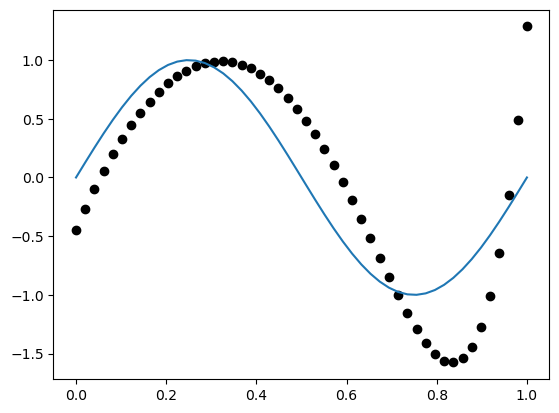

In [8]:
import numpy as np
import matplotlib.pyplot as plt

class PolynomialRegression6:
    ''' M the degree of polynome, learning_rate, num_iterations are the parameters that can make
    our model perform better or worse sa depends to their values, this latest does not changes during the training, unlike of
    the hyparameters weights that changes in eatch iterations '''
    
    def __init__(self, M:int=3, learning_rate:float=0.0001,num_iterations=100000, lambd=np.exp(-8.05)):# lambda meaning something in python
        self.M=M
        self.learning_rate=learning_rate 
        self.num_iterations=num_iterations
        self.w=np.random.rand(M+1)
        self.lambd=lambd
        
        
        
    def fit(self, X, t):
        X,t=np.array(X), np.array(t)
        assert X.ndim==t.ndim
        assert self.M<X.shape[0]
        X=np.vander(X, self.M+1, increasing=True)
        for i in range(self.num_iterations):
            # update the predictions
            y=np.dot(X, self.w.T)
            # update the weights
            self.w=self.w-self.learning_rate*np.dot(X.T, y-t)+self.lambd*self.w/np.linalg.norm(self.w) # this in the only change in whole code
        return self.w
            
    def predict(self, X):
        X=np.array(X)
        X=np.vander(X, self.M+1, increasing=True)
        y=np.dot(X, self.w.T)
        return y
# Example usage
X = np.linspace(0,1,50)
t=np.sin(2*np.pi*X)

model = PolynomialRegression6(M=10 )
model.fit(X, t)

y_pred= model.predict(X)

plt.scatter(X, y_pred,c='black' )
plt.plot(X, t)
plt.show()

there is a slight improvement with $l2$ regulirarization, but undoubtly $SGD$ with best paraameters beat the $SGD$ with $L2$ regulirization( at least with our specific toy data and in the $training$ $~$ $data$.

## Evaluating the models:

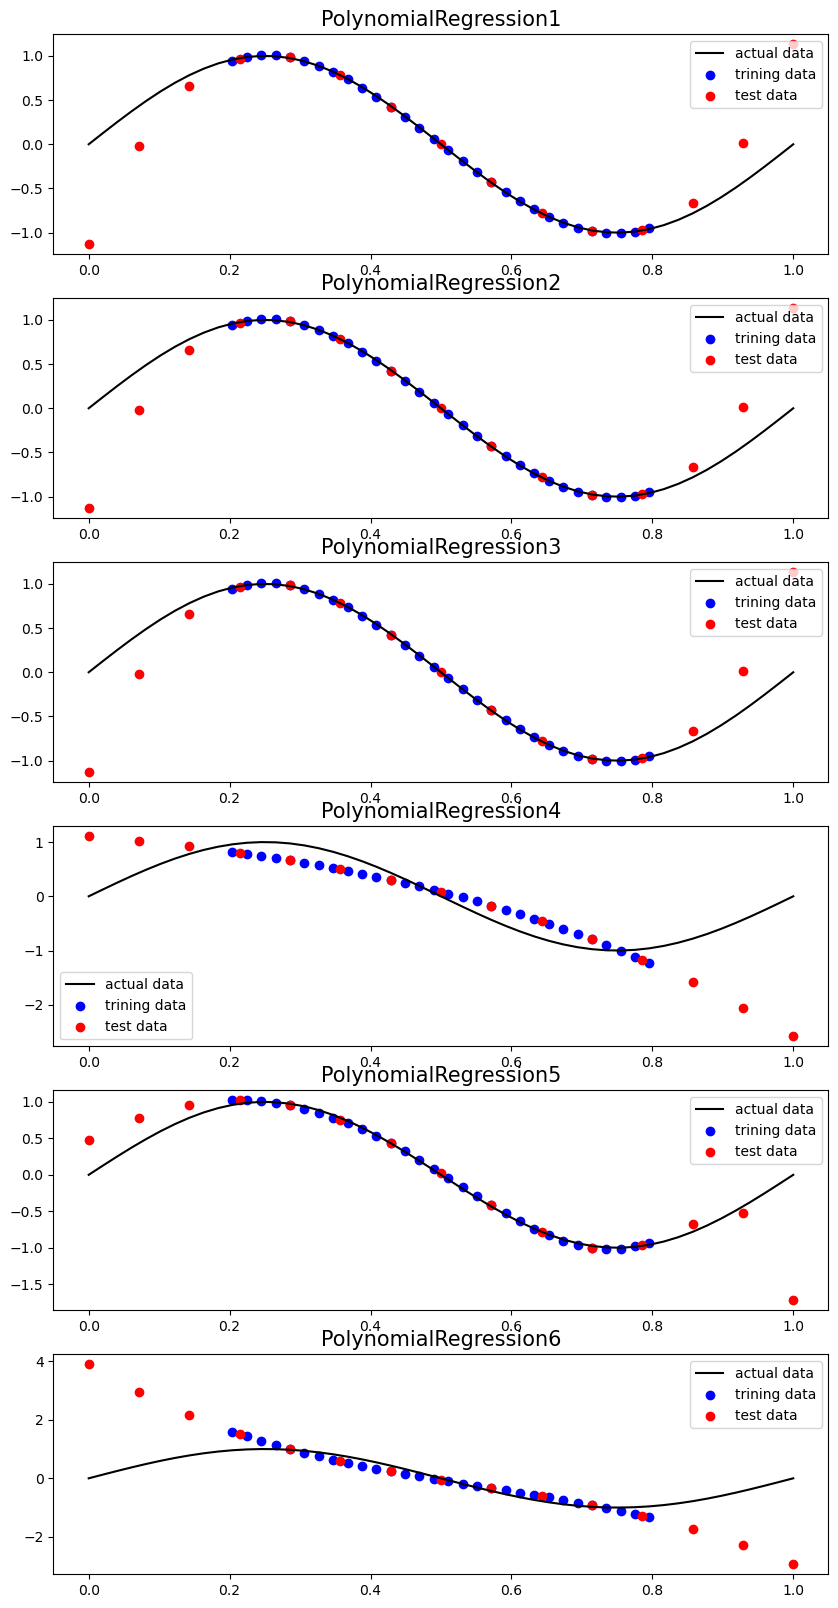

In [76]:
import matplotlib.pyplot as plt
models=[PolynomialRegression1(), PolynomialRegression2(), PolynomialRegression3(),
        PolynomialRegression4(), PolynomialRegression5(), PolynomialRegression6() ]


fig, ax=plt.subplots(6, 1, figsize=(10,20))
# Example usage
X = np.linspace(0,1,50)
X_train=X[10:40]
t=np.sin(2*np.pi*X)
t_train=t[10:40]

X_test=np.linspace(0, 1, 15)
for i in range(6):
    
        models[i].fit(X_train, t_train)
        y=models[i].predict(X_train)
        y_test=models[i].predict(X_test)
       
        ax[i].plot(X, t, color='black', label='actual data')
        ax[i].set_title('PolynomialRegression'+str(i+1), fontsize=15)
        ax[i].scatter(X_train, y, color='blue', label='trining data')
        ax[i].scatter(X_test, y_test, color='red', label='test data')
        ax[i].legend()
        


the fourth and latest model doesn't matching even the $training$ $~$$data$, all the rest are the promissing models (the three ones are equivalent, so actually it is one) even it seems has tendencies to overfit in the $test$ $~$$data$.

so we keeping the models $PolynomialRegression1$ and $PolynomialRegression5$ to compre it with the $sklearn's $$~$$PolynomialRegression$ .

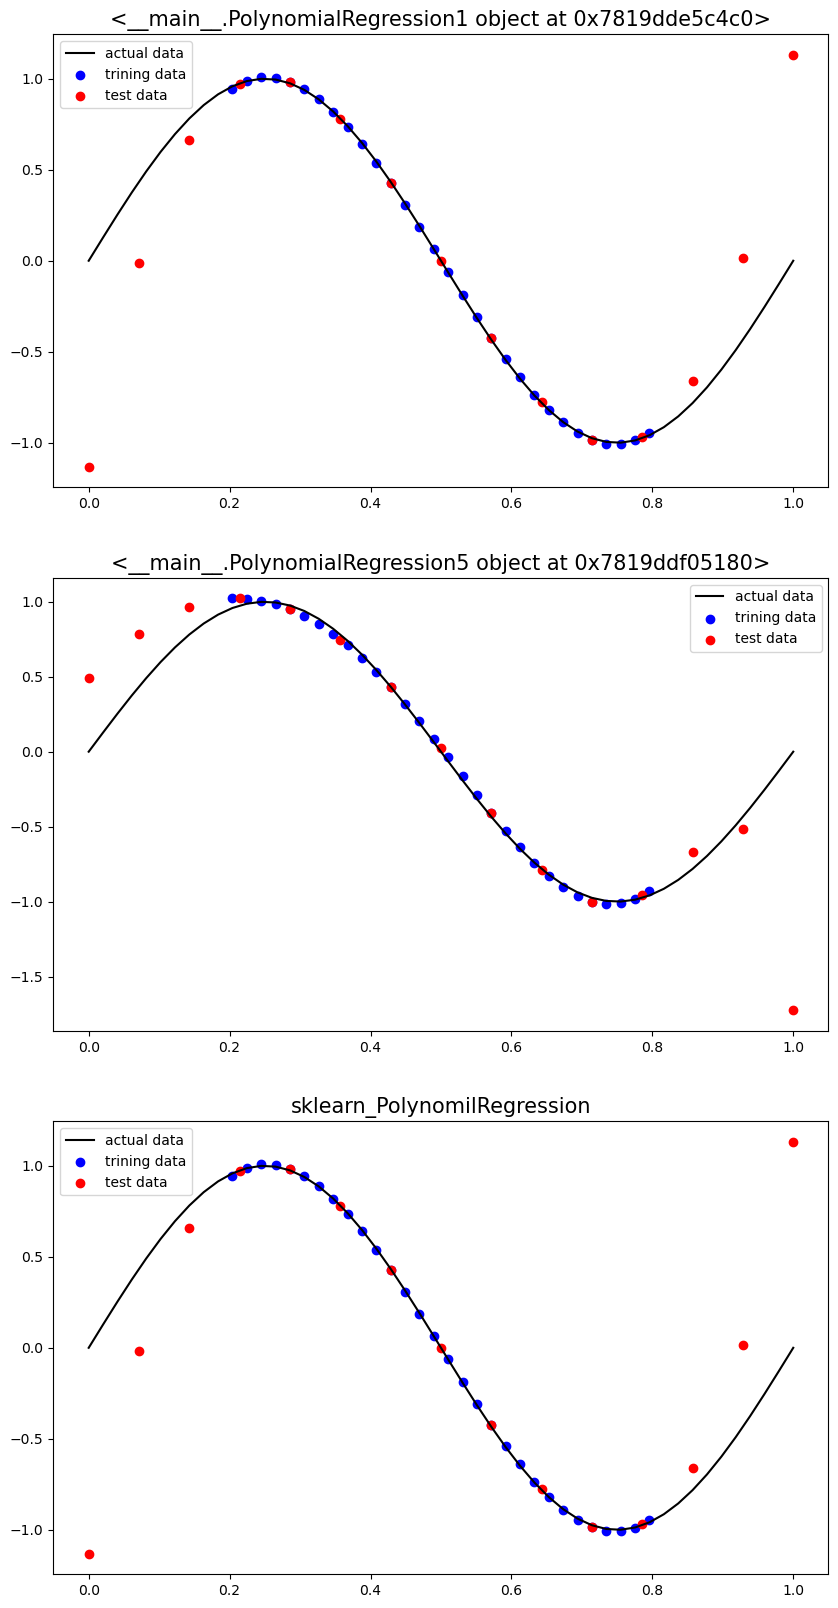

In [102]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

fig, ax=plt.subplots(3, 1, figsize=(10,20))
X_test=np.linspace(0, 1, 15)
models=[PolynomialRegression1(), PolynomialRegression5()]

for i in range(2):
    
        models[i].fit(X_train, t_train)
        y=models[i].predict(X_train)
        y_test=models[i].predict(X_test)
       
        ax[i].plot(X, t, color='black', label='actual data')
        ax[i].set_title(str(models[i]), fontsize=15)
        ax[i].scatter(X_train, y, color='blue', label='trining data')
        ax[i].scatter(X_test, y_test, color='red', label='test data')
        ax[i].legend()

# Example usage
X = np.linspace(0,1,50)
X_train=X[10:40]
t=np.sin(2*np.pi*X)
t_train=t[10:40]

# Transform input data
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X_train.reshape((-1, 1)))
# Fit the model
sklearn_PolynomilRegression = LinearRegression()
sklearn_PolynomilRegression.fit(X_poly, t_train)      
# Test data
y=sklearn_PolynomilRegression.predict(poly.fit_transform(X_train.reshape((-1,1))))
y_test=sklearn_PolynomilRegression.predict(poly.fit_transform(X_test.reshape((-1,1))))
       
ax[2].plot(X, t, color='black', label='actual data')
ax[2].set_title('sklearn_PolynomilRegression', fontsize=15)
ax[2].scatter(X_train, y, color='blue', label='trining data')
ax[2].scatter(X_test, y_test, color='red', label='test data')
ax[2].legend()






as you can infere, $sklearn's$$~$$PolynomialRegression$ and $PolynomialRegression$ are indentical, due, $sklearn.PolynomialFeature.fit \_transform$ is equivalent to $numpy.linalg.vander$ ,and $sklearn.linear\_ model.LinearRegression$ is equivalent to $numpy.linalg.solve$. so there are the exact model.

## 2 Working With Real Data: